In [6]:
using Pkg
Pkg.installed()

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.7\Pkg\src\Pkg.jl:595


Dict{String, VersionNumber} with 13 entries:
  "CSV"               => v"0.10.2"
  "StatsModels"       => v"0.6.28"
  "Hwloc"             => v"2.0.0"
  "Distributions"     => v"0.25.49"
  "HypothesisTests"   => v"0.10.6"
  "BenchmarkTools"    => v"1.3.1"
  "StatsKit"          => v"0.3.1"
  "LanguageServer"    => v"4.2.0"
  "StatsBase"         => v"0.33.16"
  "Plots"             => v"1.25.11"
  "DataFrames"        => v"1.3.2"
  "DistributedArrays" => v"0.6.6"
  "PlotlyJS"          => v"0.18.8"

In [1]:
using CSV

In [2]:
using DataFrames

In [3]:
lap_times_raw = DataFrame(CSV.File("C:/Users/liber/Documents/GitHub/Portifolio/F1_dataset/lap_times.csv"));

In [4]:
hamilton = filter(row -> row.driverId == 1 , lap_times_raw);

In [5]:
hamilton_race_1 = filter(row -> row.raceId == 841, hamilton);

In [6]:
using Plots 
gr()

Plots.GRBackend()

In [7]:
histogram(hamilton_race_1.milliseconds, bins = 100);

In [8]:
hamilton_race_2 = filter(row -> row.raceId == 1015, hamilton);

In [9]:
scatter(hamilton_race_2.milliseconds);

In [10]:
race1015 = filter(row -> row.raceId == 1015 , lap_times_raw);

In [12]:
using Statistics

In [13]:
function mean_groups(grouped_data)    
    mean_times = Dict()
    for (j, i) in enumerate(keys(grouped_data))
        mean_ = mean(get(gd, i, nothing).milliseconds)
        driver = get(gd, i, nothing).driverId[1]
        mean_times[driver] = mean_  
    end
    return mean_times
end

mean_groups (generic function with 1 method)

In [58]:
means = mean_groups(gd)

Dict{Any, Any} with 20 entries:
  20  => 79628.7
  826 => 80295.0
  830 => 79602.2
  8   => 81260.8
  807 => 80777.2
  1   => 79595.3
  154 => 80313.7
  848 => 80303.0
  847 => 80971.1
  9   => 81655.9
  842 => 79722.9
  846 => 80451.8
  840 => 81061.0
  817 => 80376.0
  841 => 81768.4
  822 => 79635.9
  825 => 80726.7
  844 => 90650.2
  815 => 80738.9
  832 => 80280.7

In [59]:
delete!(means, 844)

Dict{Any, Any} with 19 entries:
  20  => 79628.7
  826 => 80295.0
  830 => 79602.2
  8   => 81260.8
  807 => 80777.2
  1   => 79595.3
  154 => 80313.7
  848 => 80303.0
  847 => 80971.1
  9   => 81655.9
  842 => 79722.9
  846 => 80451.8
  840 => 81061.0
  817 => 80376.0
  841 => 81768.4
  822 => 79635.9
  825 => 80726.7
  815 => 80738.9
  832 => 80280.7

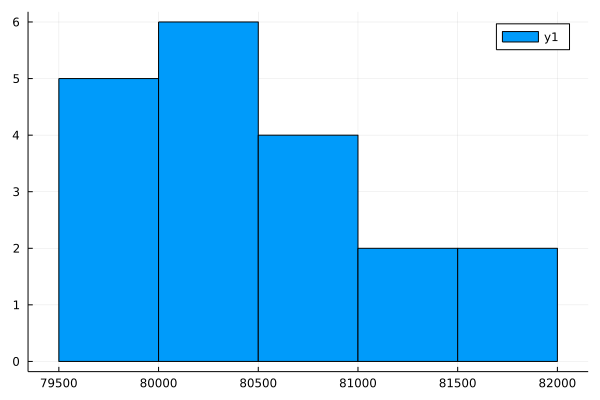

In [66]:
histogram(means, bin = 9)

In [14]:
drivers_raw = DataFrame(CSV.File("C:/Users/liber/Documents/GitHub/Portifolio/F1_dataset/drivers.csv"));

,driverId,driverRef,number,code,forename,surname,dob
,Int64,String31,String3,String3,String31,String31,Date
1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07
2,2,heidfeld,\\N,HEI,Nick,Heidfeld,1977-05-10
3,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27
4,4,alonso,14,ALO,Fernando,Alonso,1981-07-29
5,5,kovalainen,\\N,KOV,Heikki,Kovalainen,1981-10-19
6,6,nakajima,\\N,NAK,Kazuki,Nakajima,1985-01-11
7,7,bourdais,\\N,BOU,Sébastien,Bourdais,1979-02-28
8,8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17
9,9,kubica,88,KUB,Robert,Kubica,1984-12-07


In [15]:
function drivers_dict(data)
    drivers = Dict()
    for i in 1:nrow(drivers_raw)
        ID = drivers_raw.driverId[i]
        driver = drivers_raw.surname[i]
        drivers[ID] = driver
    end
    return drivers
end

drivers_dict (generic function with 1 method)

In [74]:
nrow(drivers_raw)

854

In [28]:
drivers = drivers_dict(drivers_raw)

Dict{Any, Any} with 854 entries:
  719 => "Scherrer"
  699 => "Nalon"
  831 => "Nasr"
  319 => "Dolhem"
  687 => "Whitehead"
  185 => "Bellof"
  823 => "van der Garde"
  420 => "Raby"
  525 => "Bryan"
  365 => "Hahne"
  638 => "Volonterio"
  263 => "Kozarowitzky"
  422 => "Gubby"
  242 => "Galica"
  183 => "Hesnault"
  551 => "de Filippis"
  224 => "Fittipaldi"
  694 => "de Riu"
  692 => "Helfrich"
  ⋮   => ⋮

In [29]:
drivers[1]

"Hamilton"

In [37]:
names(lap_times_raw)

6-element Vector{String}:
 "raceId"
 "driverId"
 "lap"
 "position"
 "time"
 "milliseconds"

In [38]:
races = DataFrame(CSV.File("C:/Users/liber/Documents/GitHub/Portifolio/F1_dataset/races.csv"));

In [41]:
first(races, 6)

,raceId,year,round,circuitId,name,date,time,url
,Int64,Int64,Int64,Int64,String31,Date,String15,String
1,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_Grand_Prix
2,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Grand_Prix
3,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Grand_Prix
4,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Grand_Prix
5,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Grand_Prix
6,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand_Prix


In [42]:
function races_dict(data)
    races_dictionary = Dict()
    for i in 1:nrow(data)
        ID = data.raceId[i]
        year = data.year[i]
        circuit = data.name[i]
        races_dictionary[ID] = (year, circuit)
    end
    return races_dictionary
end

races_dict (generic function with 1 method)

In [43]:
race_dict = races_dict(races)

Dict{Any, Any} with 1080 entries:
  719  => (1963, "Monaco Grand Prix")
  1028 => (2019, "United States Grand Prix")
  699  => (1965, "South African Grand Prix")
  831  => (1951, "Italian Grand Prix")
  1074 => (2022, "Bahrain Grand Prix")
  319  => (1991, "Japanese Grand Prix")
  687  => (1967, "Italian Grand Prix")
  185  => (1999, "Hungarian Grand Prix")
  823  => (1952, "Dutch Grand Prix")
  1090 => (2022, "Russian Grand Prix")
  420  => (1985, "Brazilian Grand Prix")
  525  => (1979, "Canadian Grand Prix")
  365  => (1989, "Hungarian Grand Prix")
  638  => (1971, "German Grand Prix")
  263  => (1994, "French Grand Prix")
  422  => (1985, "San Marino Grand Prix")
  242  => (1995, "San Marino Grand Prix")
  183  => (1999, "Austrian Grand Prix")
  551  => (1977, "French Grand Prix")
  ⋮    => ⋮

In [44]:
D = Dict('a'=>5, 'b'=>6)

Dict{Char, Int64} with 2 entries:
  'a' => 5
  'b' => 6

In [50]:
depois_de_2013 = [i for (i, j) in race_dict if j[1]>2013]
# filter(x -> x[1]> 2013, race_dict)

183-element Vector{Int64}:
 1028
 1074
 1090
 1015
 1039
 1085
 1036
 1058
  962
  918
    ⋮
  952
  989
  907
 1032
  939
  951
  944
 1065
  979